# Install Libraries

In [62]:
%pip install numpy
%pip install pandas
%pip install openpyxl
%pip install matplotlib
%pip install statsmodels
%pip install sklearn
%pip install prophet

Python(20545) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Python(20548) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Python(20554) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Python(20558) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Python(20561) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Python(20564) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Defaulting to user installation because normal site-packages is not writeable
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a

Python(20571) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [97]:
import os
import argparse
import numpy as np
from numpy.linalg import LinAlgError
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from prophet import Prophet

# Input Arguments

In [119]:
NUMBER_OF_MONTHS = 12
MEDIUM_THRESHOLD = 200000 # in dollars
LARGE_THRESHOLD = 533000 # in dollars

actual_file_path = 'NEW CBO EBO Revenue 21-22.xlsx'
three_month_file_path = 'NEW TruCast Three Month.xlsx'
arima_file_path = 'NEW TruCast Arima.xlsx'
prophet_file_path = 'NEW TruCast Prophet 21-22.xlsx'
combined_file_path = 'NEW TruCast Output 2023.xlsx'

actual = pd.read_excel(actual_file_path, index_col='site').fillna(0)
three_month = pd.read_excel(three_month_file_path, index_col='site').fillna(0)
arima = pd.read_excel(arima_file_path, index_col='site').fillna(0)
prophet = pd.read_excel(prophet_file_path, index_col='site').fillna(0)
combined = pd.read_excel(combined_file_path, index_col='site').fillna(0)
#print(actual.columns)
#actual.columns = actual.columns.strftime('%Y-%m')

actual['Size'] = actual.iloc[:, -2*NUMBER_OF_MONTHS:-NUMBER_OF_MONTHS].sum(axis=1)
actual['Size'] = actual['Size'].apply(lambda x: 'LARGE' if x > LARGE_THRESHOLD else ('MEDIUM' if MEDIUM_THRESHOLD <= x else 'SMALL'))
actual.set_index('Size', append=True, inplace=True)

three_month['Size'] = three_month.iloc[:, -2*NUMBER_OF_MONTHS:-NUMBER_OF_MONTHS].sum(axis=1)
three_month['Size'] = three_month['Size'].apply(lambda x: 'LARGE' if x > LARGE_THRESHOLD else ('MEDIUM' if MEDIUM_THRESHOLD <= x else 'SMALL'))
three_month.set_index('Size', append=True, inplace=True)

arima['Size'] = arima.iloc[:, -2*NUMBER_OF_MONTHS:-NUMBER_OF_MONTHS].sum(axis=1)
arima['Size'] = arima['Size'].apply(lambda x: 'LARGE' if x > LARGE_THRESHOLD else ('MEDIUM' if MEDIUM_THRESHOLD <= x else 'SMALL'))
arima.set_index('Size', append=True, inplace=True)

prophet['Size'] = prophet.iloc[:, -2*NUMBER_OF_MONTHS:-NUMBER_OF_MONTHS].sum(axis=1)
prophet['Size'] = prophet['Size'].apply(lambda x: 'LARGE' if x > LARGE_THRESHOLD else ('MEDIUM' if MEDIUM_THRESHOLD <= x else 'SMALL'))
prophet.set_index('Size', append=True, inplace=True)

combined['Size'] = combined.iloc[:, -2*NUMBER_OF_MONTHS:-NUMBER_OF_MONTHS].sum(axis=1)
combined['Size'] = combined['Size'].apply(lambda x: 'LARGE' if x > LARGE_THRESHOLD else ('MEDIUM' if MEDIUM_THRESHOLD <= x else 'SMALL'))
combined.set_index('Size', append=True, inplace=True)

actual_series = actual.sum(axis=0)
actual_series.to_csv('GRAPH_actuals.csv')
combined_series = combined.iloc[:, -NUMBER_OF_MONTHS:].sum(axis=0)
combined_series.to_csv('GRAPH_combined.csv')

actual = actual.iloc[:, -NUMBER_OF_MONTHS:]
three_month = three_month.iloc[:, -NUMBER_OF_MONTHS:]
arima = arima.iloc[:, -NUMBER_OF_MONTHS:]
prophet = prophet.iloc[:, -NUMBER_OF_MONTHS:]
combined = combined.iloc[:, -NUMBER_OF_MONTHS:]

actual_series = actual.sum(axis=0)
three_month_series = three_month.sum(axis=0)
arima_series = arima.sum(axis=0)
prophet_series = prophet.sum(axis=0)
combined_series = combined.sum(axis=0)


print(actual_series)
print(prophet_series)

2022-01    4648168.81
2022-02    4884602.75
2022-03    5904520.66
2022-04    5377780.84
2022-05    7510536.98
2022-06    7897622.33
2022-07    7214236.39
2022-08    8017803.38
2022-09    7962723.71
2022-10    7379876.92
2022-11    7755809.19
2022-12    7614458.17
dtype: float64
2022-01    4.934541e+06
2022-02    4.901539e+06
2022-03    5.291716e+06
2022-04    5.069748e+06
2022-05    5.323854e+06
2022-06    5.086047e+06
2022-07    5.171267e+06
2022-08    5.469571e+06
2022-09    5.318324e+06
2022-10    5.522245e+06
2022-11    5.396505e+06
2022-12    5.705386e+06
dtype: float64


In [120]:
# Calculate Absolute Percent Difference

three_month_abs_percent_difference = (abs(three_month_series - actual_series) / actual_series * 100).mean()
arima_abs_percent_difference = (abs(arima_series - actual_series) / actual_series * 100).mean()
prophet_abs_percent_difference = (abs(prophet_series - actual_series) / actual_series * 100).mean()
combined_abs_percent_difference = (abs(combined_series - actual_series) / actual_series * 100).mean()

print("3 Month Absolute Percent Difference:", three_month_abs_percent_difference)
print("ARIMA Absolute Percent Difference:", arima_abs_percent_difference)
print("Prophet Absolute Percent Difference:", prophet_abs_percent_difference)
print("Combined Absolute Percent Difference:", combined_abs_percent_difference)

3 Month Absolute Percent Difference: nan
ARIMA Absolute Percent Difference: nan
Prophet Absolute Percent Difference: 21.775238844006083
Combined Absolute Percent Difference: nan


In [121]:
# Calculate Percent Different

three_month_abs_percent_difference = ((three_month_series - actual_series) / actual_series * 100).mean()
arima_abs_percent_difference = ((arima_series - actual_series) / actual_series * 100).mean()
prophet_abs_percent_difference = ((prophet_series - actual_series) / actual_series * 100).mean()
combined_abs_percent_difference = ((combined_series - actual_series) / actual_series * 100).mean()

three_month_abs_difference = ((three_month_series - actual_series)).sum()
arima_abs_difference = ((arima_series - actual_series)).sum()
prophet_abs_difference = ((prophet_series - actual_series)).sum()
combined_abs_difference = ((combined_series - actual_series)).sum()

print("3 Month Percent Difference:", three_month_abs_percent_difference)
print("ARIMA Percent Difference:", arima_abs_percent_difference)
print("Prophet Percent Difference:", prophet_abs_percent_difference)
print("Combined Percent Difference:", combined_abs_percent_difference)

print("3 Month Dollar Difference:", three_month_abs_difference)
print("ARIMA Dollar Difference:", arima_abs_difference)
print("Prophet Dollar Difference:", prophet_abs_difference)
print("Combined Dollar Difference:", combined_abs_difference)

3 Month Percent Difference: nan
ARIMA Percent Difference: nan
Prophet Percent Difference: -20.69062392698441
Combined Percent Difference: nan
3 Month Dollar Difference: 0.0
ARIMA Dollar Difference: 0.0
Prophet Dollar Difference: -18977397.201599173
Combined Dollar Difference: 0.0


# Graph Residuals

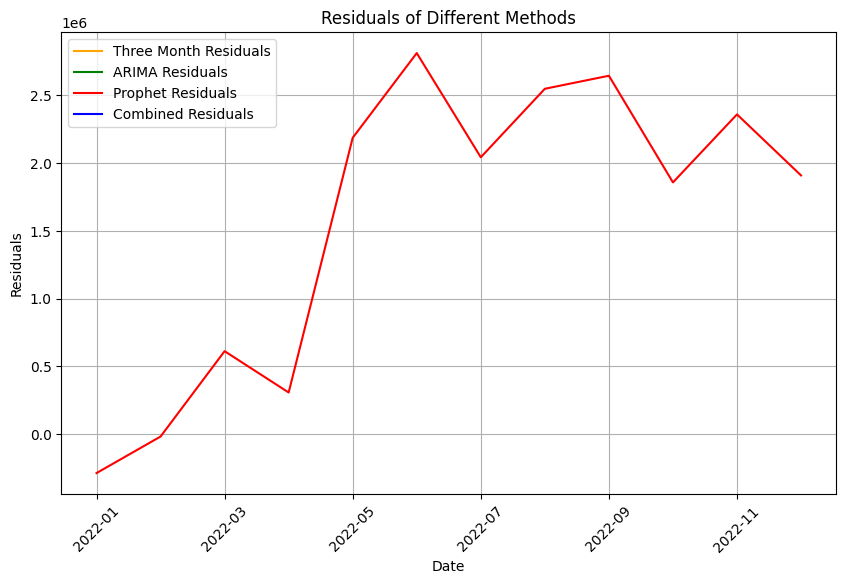

In [122]:
# Calculate residuals for each method
three_month_residuals = actual_series - three_month_series
arima_residuals = actual_series - arima_series
prophet_residuals = actual_series - prophet_series
combined_residuals = actual_series - combined_series

# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(three_month_residuals, label='Three Month Residuals', color='Orange')
plt.plot(arima_residuals, label='ARIMA Residuals', color='Green')
plt.plot(prophet_residuals, label='Prophet Residuals', color='Red')
plt.plot(combined_residuals, label='Combined Residuals', color='Blue')

plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals of Different Methods')
plt.legend()
plt.xticks(actual_series.index[::2], rotation=45)
plt.grid(True)
plt.show()

# Different Sizes

In [123]:
actual_series_small = actual.loc[(slice(None), 'SMALL'), :].sum(axis=0)
three_month_series_small = three_month.loc[(slice(None), 'SMALL'), :].sum(axis=0)
arima_series_small = arima.loc[(slice(None), 'SMALL'), :].sum(axis=0)
prophet_series_small = prophet.loc[(slice(None), 'SMALL'), :].sum(axis=0)
combined_series_small = combined.loc[(slice(None), 'SMALL'), :].sum(axis=0)

actual_series_medium = actual.loc[(slice(None), 'MEDIUM'), :].sum(axis=0)
three_month_series_medium = three_month.loc[(slice(None), 'MEDIUM'), :].sum(axis=0)
arima_series_medium = arima.loc[(slice(None), 'MEDIUM'), :].sum(axis=0)
prophet_series_medium = prophet.loc[(slice(None), 'MEDIUM'), :].sum(axis=0)
combined_series_medium = combined.loc[(slice(None), 'MEDIUM'), :].sum(axis=0)

actual_series_large = actual.loc[(slice(None), 'LARGE'), :].sum(axis=0)
three_month_series_large = three_month.loc[(slice(None), 'LARGE'), :].sum(axis=0)
arima_series_large = arima.loc[(slice(None), 'LARGE'), :].sum(axis=0)
prophet_series_large = prophet.loc[(slice(None), 'LARGE'), :].sum(axis=0)
combined_series_large = combined.loc[(slice(None), 'LARGE'), :].sum(axis=0)

In [124]:
three_month_percent_difference = ((three_month_series - actual_series) / actual_series * 100).mean()
arima_percent_difference = ((arima_series - actual_series) / actual_series * 100).mean()
prophet_percent_difference = ((prophet_series - actual_series) / actual_series * 100).mean()
combined_percent_difference = ((combined_series - actual_series) / actual_series * 100).mean()

print("3 Month Percent Difference:", three_month_percent_difference)
print("ARIMA Percent Difference:", arima_percent_difference)
print("Prophet Percent Difference:", prophet_percent_difference)
print("Combined Percent Difference:", combined_percent_difference)

3 Month Percent Difference: nan
ARIMA Percent Difference: nan
Prophet Percent Difference: -20.69062392698441
Combined Percent Difference: nan


In [125]:
categories = ['SMALL', 'MEDIUM', 'LARGE', 'TOTAL']

results = []
for category in categories:
    if category == 'TOTAL':
        # Calculate for the total data without filtering by category
        actual_series_cat = actual.sum(axis=0)
        three_month_series_cat = three_month.sum(axis=0)
        arima_series_cat = arima.sum(axis=0)
        prophet_series_cat = prophet.sum(axis=0)
        combined_series_cat = combined.sum(axis=0)
    else:
        # Calculate for each category
        actual_series_cat = actual.loc[(slice(None), category), :].sum(axis=0)
        three_month_series_cat = three_month.loc[(slice(None), category), :].sum(axis=0)
        arima_series_cat = arima.loc[(slice(None), category), :].sum(axis=0)
        prophet_series_cat = prophet.loc[(slice(None), category), :].sum(axis=0)
        combined_series_cat = combined.loc[(slice(None), category), :].sum(axis=0)

    three_month_percent_diff = ((three_month_series_cat - actual_series_cat) / actual_series_cat * 100).mean()
    arima_percent_diff = ((arima_series_cat - actual_series_cat) / actual_series_cat * 100).mean()
    prophet_percent_diff = ((prophet_series_cat - actual_series_cat) / actual_series_cat * 100).mean()
    combined_percent_diff = ((combined_series_cat - actual_series_cat) / actual_series_cat * 100).mean()

    three_month_abs_percent_diff = (abs(three_month_series_cat - actual_series_cat) / actual_series_cat * 100).mean()
    arima_abs_percent_diff = (abs(arima_series_cat - actual_series_cat) / actual_series_cat * 100).mean()
    prophet_abs_percent_diff = (abs(prophet_series_cat - actual_series_cat) / actual_series_cat * 100).mean()
    combined_abs_percent_diff = (abs(combined_series_cat - actual_series_cat) / actual_series_cat * 100).mean()
    
    results.append([three_month_percent_diff, arima_percent_diff, prophet_percent_diff, combined_percent_diff, three_month_abs_percent_diff, arima_abs_percent_diff, prophet_abs_percent_diff, combined_abs_percent_diff])

# Create DataFrame for results
results_df = pd.DataFrame(results, index=categories, columns=['3 Month', 'ARIMA', 'Prophet', 'Combined', '3 Month (ABS)', 'ARIMA (ABS)', 'Prophet (ABS)', 'Combined (ABS)'])

# Print the table
results_df.head()

,3 Month,ARIMA,Prophet,Combined,3 Month (ABS),ARIMA (ABS),Prophet (ABS),Combined (ABS)
SMALL,NaN,NaN,-57.228944,NaN,NaN,NaN,57.228944,NaN
MEDIUM,NaN,NaN,15.656594,NaN,NaN,NaN,15.995084,NaN
LARGE,NaN,NaN,13.165545,NaN,NaN,NaN,13.267082,NaN
TOTAL,NaN,NaN,-20.690624,NaN,NaN,NaN,21.775239,NaN
